<a href="https://colab.research.google.com/github/A01173639/Regresion-Lineal/blob/main/DF_ACT6_1_Regresi%C3%B3n_Lineal__Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df_mex = pd.read_csv("DF_MEXICO_clean.csv", encoding='ISO-8859-1')

<ipython-input-5-f10c77402553>:1: DtypeWarning: Columns (2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mex = pd.read_csv("DF_MEXICO_clean.csv", encoding='ISO-8859-1')


In [ ]:
# Filtrar los datos para obtener solo los tipos de habitación "Entire home/apt" y "Hotel room"
private_room = df_mex[df_mex['room_type'] == 'Private room']
hotel_room = df_mex[df_mex['room_type'] == 'Hotel room']

# Unir ambos DataFrames en uno solo
filtered_df = pd.concat([private_room, hotel_room])

#**“host_acceptance_rate vs host_response_rate”**

In [ ]:
filtered_df['host_response_rate'] = filtered_df['host_response_rate'].astype(str)  # convert to string type
filtered_df['host_response_rate'] = filtered_df['host_response_rate'].str.replace('%', '')  # Remove percentage symbol
filtered_df['host_response_rate'] = pd.to_numeric(filtered_df['host_response_rate'], errors='coerce')  # Convert to numeric


<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

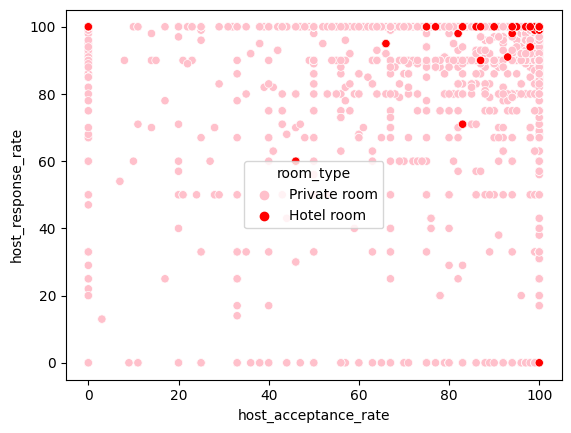

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', hue='room_type', palette={'Private room': 'pink', 'Hotel room': 'red'}, data=filtered_df)

#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= filtered_df[['host_acceptance_rate']]
Var_Dep= filtered_df['host_response_rate']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [ ]:

# Fit the model with the independent and dependent variables
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.31829492]),
 'rank_': 1,
 'singular_': array([2319.14308864]),
 'intercept_': 63.29099845620411}

**Modelo matemático: y= 0.15157x +79.828714**

---




In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.11943839979778026

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=filtered_df[['host_acceptance_rate']])
y_pred

array([95.12049024, 63.29099846, 63.29099846, ..., 95.12049024,
       93.21072074, 95.12049024])

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

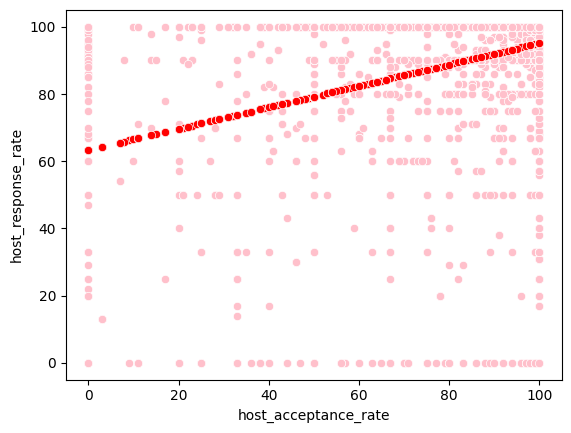

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="pink", data=filtered_df)
sns.scatterplot(x='host_acceptance_rate', y=y_pred, color="red", data=filtered_df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.11943839979778026
Coeficiente de correlación:  0.3455986108157558


#**“host_acceptance_rate vs price”**

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

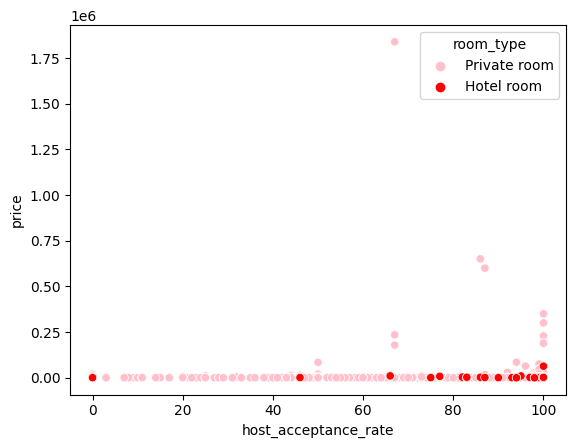

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='price', hue='room_type', palette={'Private room': 'pink', 'Hotel room': 'red'}, data=filtered_df)

#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= filtered_df[['host_acceptance_rate']]
Var_Dep= filtered_df['price']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Verificamos la función relacionada al modelo
type(model)

# Fit the model with the independent and dependent variables
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-3.89881752]),
 'rank_': 1,
 'singular_': array([2319.14308864]),
 'intercept_': 1863.515039054653}

**Modelo matematico: -3.8727x + 788.6424**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

1.7493227548293078e-05

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

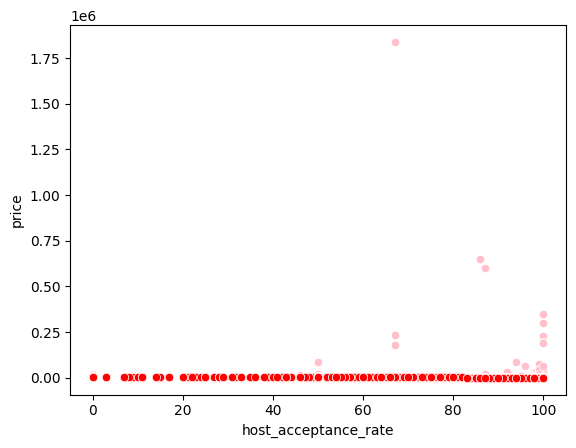

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=filtered_df[['host_acceptance_rate']])
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='price', color="pink", data=filtered_df)
sns.scatterplot(x='host_acceptance_rate', y= y_pred,color="red", data=filtered_df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  1.7493227548293078e-05
Coeficiente de correlación:  0.004182490591536707


#**host_acceptance_rate vs number_of_reviews**

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

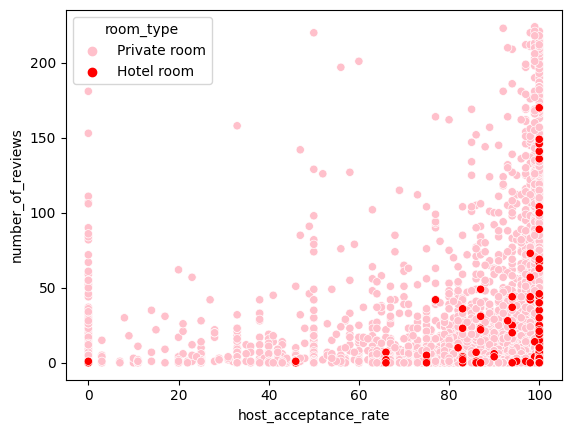

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', hue='room_type', palette={'Private room': 'pink', 'Hotel room': 'red'}, data=filtered_df)

#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= filtered_df[['host_acceptance_rate']]
Var_Dep= filtered_df['number_of_reviews']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Verificamos la función relacionada al modelo
type(model)

# Fit the model with the independent and dependent variables
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.21059794]),
 'rank_': 1,
 'singular_': array([2319.14308864]),
 'intercept_': 2.512777064865009}

**Modelo matematico : y= 0.5002x +(-3.5969)**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.02262607185406229

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

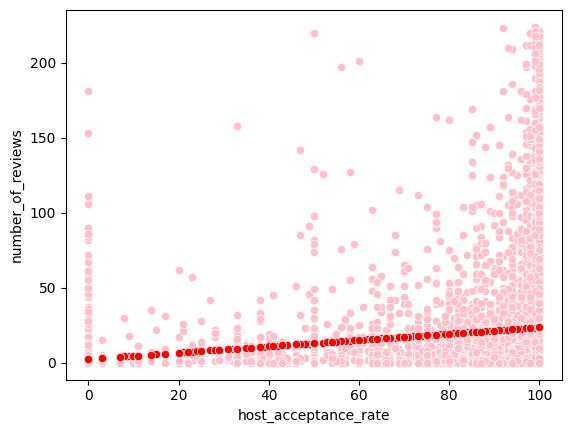

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=filtered_df[['host_acceptance_rate']])
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="pink", data=filtered_df)
sns.scatterplot(x='host_acceptance_rate', y= y_pred,color="red", data=filtered_df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.02262607185406229
Coeficiente de correlación:  0.1504196524861771


#**review_scores_location vs review_scores_cleanliness**


<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

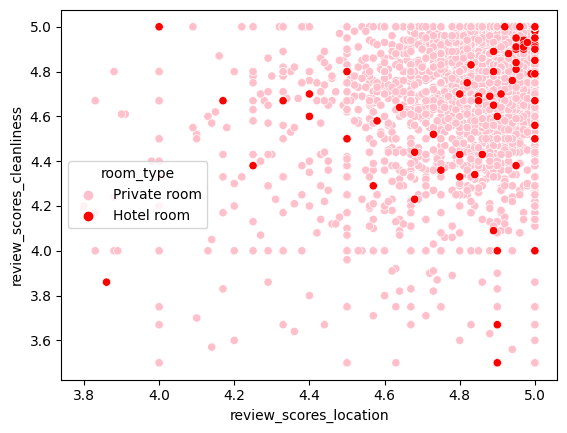

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', hue='room_type', palette={'Private room': 'pink', 'Hotel room': 'red'}, data=filtered_df)

#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= filtered_df[['review_scores_location']]
Var_Dep= filtered_df['review_scores_cleanliness']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Verificamos la función relacionada al modelo
type(model)

# Fit the model with the independent and dependent variables
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.47580172]),
 'rank_': 1,
 'singular_': array([16.58565347]),
 'intercept_': 2.4508518660508645}

**Modelo matematico: y = 0.3007x+3.3334**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.12334537915197685

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

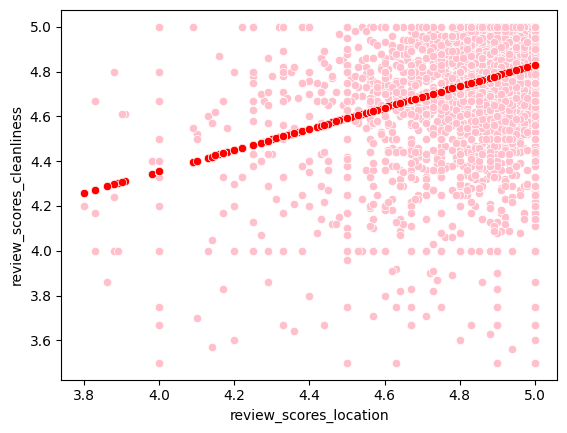

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=filtered_df[['review_scores_location']])
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color="pink", data=filtered_df)
sns.scatterplot(x='review_scores_location', y= y_pred,color="red", data=filtered_df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.12334537915197685
Coeficiente de correlación:  0.35120560808730955


#**availability_365 vs number_of_reviews**

In [ ]:
filtered_df["availability_365"] = pd.to_numeric(filtered_df["availability_365"])


In [ ]:
filtered_df["availability_365"].info()

<class 'pandas.core.series.Series'>
Int64Index: 8328 entries, 7 to 11364
Series name: availability_365
Non-Null Count  Dtype
--------------  -----
8328 non-null   int64
dtypes: int64(1)
memory usage: 130.1 KB


<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

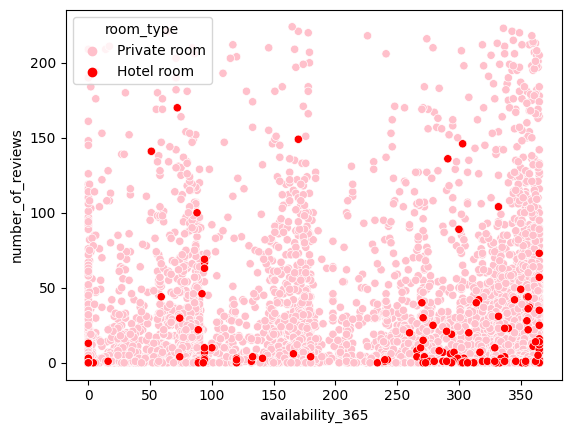

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='number_of_reviews', hue='room_type', palette={'Private room': 'pink', 'Hotel room': 'red'}, data=filtered_df)

#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= filtered_df[['availability_365']]
Var_Dep= filtered_df['number_of_reviews']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Verificamos la función relacionada al modelo
type(model)

# Fit the model with the independent and dependent variables
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.01734865]),
 'rank_': 1,
 'singular_': array([11409.63778202]),
 'intercept_': 25.311154218500597}

**Modelo matematico : y=0.02988x+ 46.6594**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0037163875881045527

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

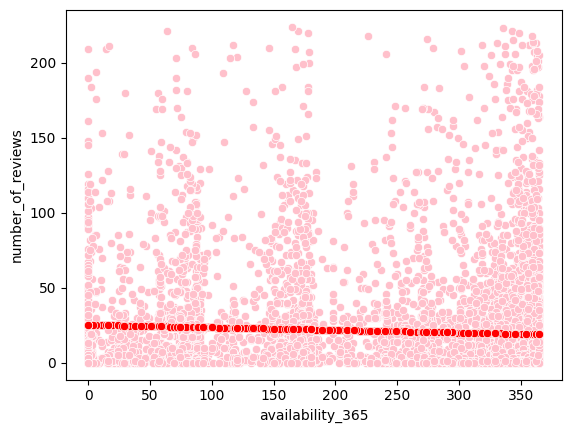

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=filtered_df[['availability_365']])
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='availability_365', y='number_of_reviews', color="pink", data=filtered_df)
sns.scatterplot(x='availability_365', y= y_pred,color="red", data=filtered_df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.0037163875881045527
Coeficiente de correlación:  0.060962181621924856


#**reviews_per_month vs review_scores_communication**

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

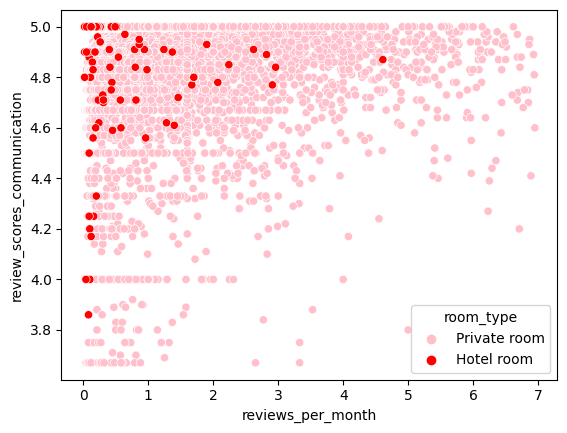

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='reviews_per_month', y='review_scores_communication', hue='room_type', palette={'Private room': 'pink', 'Hotel room': 'red'}, data=filtered_df)

#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= filtered_df[['reviews_per_month']]
Var_Dep= filtered_df['review_scores_communication']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Verificamos la función relacionada al modelo
type(model)

# Fit the model with the independent and dependent variables
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.01370703]),
 'rank_': 1,
 'singular_': array([106.12493897]),
 'intercept_': 4.859990694266025}

**Modelo matematico: y = 0.0079x+4.8588**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.005968686396596201

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

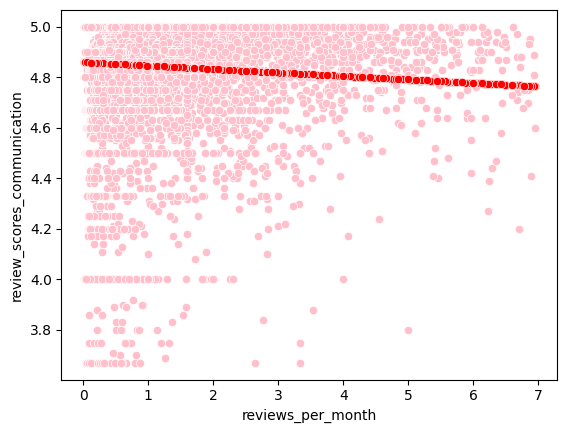

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=filtered_df[['reviews_per_month']])
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color="pink", data=filtered_df)
sns.scatterplot(x='reviews_per_month', y= y_pred,color="red", data=filtered_df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.005968686396596201
Coeficiente de correlación:  0.07725727406915288
